In [186]:
import pandas as pd
import requests
import wikipediaapi
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [334]:
def pop_ratio(Query):
    #find desired wikipedia article
    page = wikipediaapi.Wikipedia('ru').page(Query)
    #get url
    url = requests.get(page.fullurl).text
    #and extract table
    df = pd.read_html(url, match='Численность населения', skiprows = {0,1,3,5,7,9,11}, na_values= 0)[0]
    #table extracted as pandas dataframe, return it to numpy array
    df = df.values
    #reshape it and return to pandas df
    df = pd.DataFrame(df.reshape(df.size,1))
    # drop NA values
    df.dropna(inplace = True)
    #reverse df
    r_df = df.iloc[::-1]
    #reset index
    r_df.reset_index(drop = True, inplace = True)
    #values in cell include artefacts, delete it
    r_df[0] = r_df[0].str.replace('\xa0','')
    r_df[0] = r_df[0].str.replace('↘','')
    r_df[0] = r_df[0].str.replace('↗','')
    #current year is 2020, create array, where 2020 - in first position, 2019 - second etc.  
    year = np.arange(2020, 2020-r_df.shape[0], -1)
    year = pd.DataFrame(year)
    #add it as new column  in df
    r_df['year'] = year
    #exclude rows, earlier than 1990
    r_df = r_df[r_df['year']>=1995]
    #return popultion value to numeric
    r_df[0] = pd.to_numeric(r_df[0])
    #create new column. It show ratio of population in year and year before
    x=[]
    for i in range(r_df.shape[0]-1):
        X = 100*round(((r_df.values[i+1,0])/(r_df.values[i,0])),3)-100
        x.append(X)
    x.append(0)
    #add ratio to df    
    r_df['population_decline'] = x
    #and  show histogramm ratio-year
    fig, ax = plt.subplots(figsize= (14, 3))
    plt.title(Query)
    sns.barplot(y = r_df['population_decline'], x = r_df['year'])

In [339]:
SZFO = ['Население Архангельской области', 'Население Вологодской области','Население Псковской области',\
        'Население Новгородской области', 'Население Тверской области']

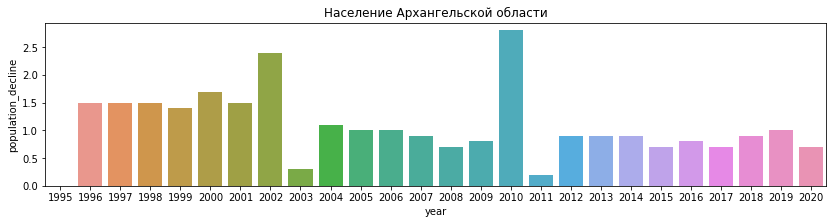

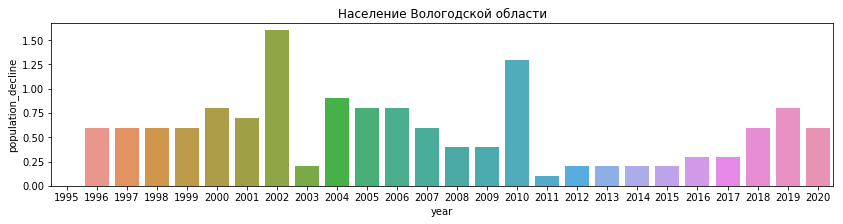

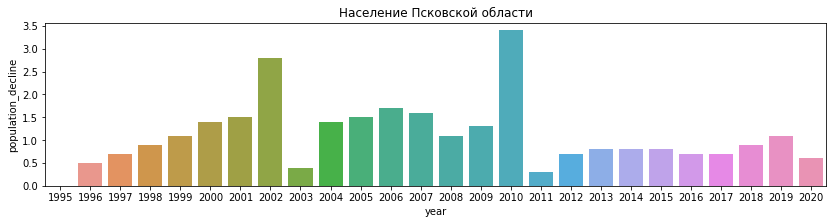

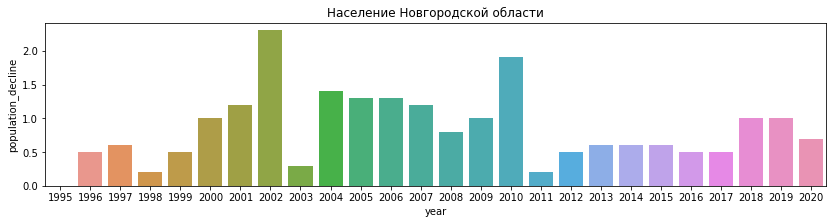

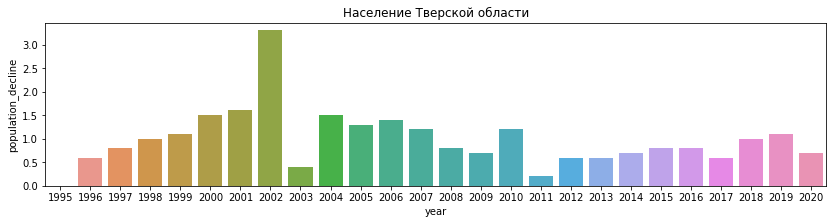

In [340]:
for region in SZFO:
    pop_ratio(region)